In [45]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [28]:
df = pd.read_csv("irrigationsystem/data.csv")

In [29]:
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [30]:
df.crop.unique()

array(['cotton'], dtype=object)

In [31]:
df = df.drop(['crop'],axis=1)

In [32]:
one= df[df.pump==1]
zero = df[df.pump==0]

In [34]:
one.head()

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1


In [35]:
zero.head()

,moisture,temp,pump
100,89,42,0
101,76,35,0
102,434,19,0
103,487,16,0
104,493,18,0


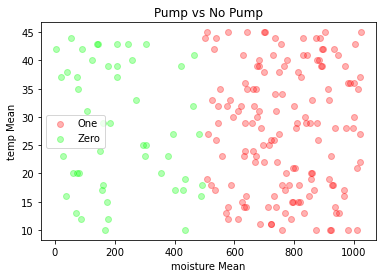

In [39]:
plt.title("Pump vs No Pump")
plt.xlabel("moisture Mean")
plt.ylabel("temp Mean")
plt.scatter(one.moisture, one.temp, color = "red", label = "One", alpha = 0.3)
plt.scatter(zero.moisture, zero.temp, color = "lime", label = "Zero", alpha = 0.3)
plt.legend()
plt.show()

In [62]:
X = df.drop(["pump"],axis=1)
y = df["pump"]


In [67]:
X.columns

Index(['moisture', 'temp'], dtype='object')

In [63]:
# Normalization:
# import numpy
# X = X - numpy.min(X) / numpy.mаx(X) - numpy.min(X)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [66]:
print("Naive Bayes score: ",nb.score(x_test, y_test))


Naive Bayes score:  0.9666666666666667


In [71]:
y_pred = nb.predict(x_test)


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  2]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        45

    accuracy                           0.97        60
   macro avg       0.98      0.93      0.95        60
weighted avg       0.97      0.97      0.97        60

